In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from gensim.models import KeyedVectors


In [2]:
import sys
!conda install --yes --prefix {sys.prefix} numpy matplotlib pandas nltk word2vec gensim


Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - anaconda
 - plotly
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/wltrimbl/anaconda3

  added / updated specs:
    - gensim
    - matplotlib
    - nltk
    - numpy
    - pandas
    - word2vec


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.11.17         |  py311hecd8cb5_0         160 KB
    pandas-2.1.4               |  py311hdb55bb0_0        14.4 MB
    word2vec-0.9.4             |  py311hb9e55a9_0          59 KB
    ------------------------------------------------------------
                                           Total:        14.6 MB

The following NEW packages will be INSTALLED:

  word2vec           pkgs/main/osx-64::word2vec-0.9.4-py311hb9e55a9_0 

The following packages will be UPDATED:

  certifi                         2023.7.22-py311

In [3]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [6]:
wv = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [7]:
# According to https://stackoverflow.com/questions/35596031/gensim-word2vec-find-number-of-words-in-vocabulary 
len(wv)  # gives me the number of items in vocabulary.

400000

In [8]:
# Okay, this demo has wv.most_similar.. which takes a "positive" and a "negative" list of words
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html
print(wv.most_similar(positive=['mushroom'], topn=5))

[('mushrooms', 0.6882121562957764), ('shiitake', 0.5467739105224609), ('oyster', 0.5166153311729431), ('edible', 0.5112664699554443), ('tomato', 0.49930161237716675)]


In [9]:
print(wv.most_similar(positive=['disappointment'], topn=5))

[('frustration', 0.7099920511245728), ('dismay', 0.6934523582458496), ('regret', 0.6406363844871521), ('sadness', 0.6207785606384277), ('anger', 0.595255970954895)]


In [10]:
# Okay, Cookie, which one of these things is not like the others?
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


In [12]:
print (wv.most_similar(positive=["Springfield", "State"], negative=["City"]))

KeyError: "Key 'Springfield' not present in vocabulary"

In [ ]:
print (wv.most_similar(positive=["Merced", "Chicago"], negative=["Illinois"]))

In [ ]:
print (wv.most_similar(positive=["Chicago", "State"], negative=["City"]))

In [13]:
# https://radimrehurek.com/gensim/models/word2vec.html
from gensim.models import KeyedVectors

In [14]:
vector = wv['computer']  # Get word2vec number for a word 
vector

array([-2.7628e-01,  1.3999e-01,  9.8519e-02, -6.4019e-01,  3.1988e-02,
        1.0066e-01, -1.8673e-01, -3.7129e-01,  5.9740e-01, -2.0405e+00,
        2.2368e-01, -2.6314e-02,  7.2408e-01, -4.3829e-01,  4.8886e-01,
       -3.5486e-03, -1.0006e-01, -3.0587e-01, -1.5621e-01, -6.8136e-02,
        2.1104e-01,  2.9287e-01, -8.8861e-02, -2.0462e-01, -5.7602e-01,
        3.4526e-01,  4.1390e-01,  1.7917e-01,  2.5143e-01, -2.2678e-01,
       -1.0103e-01,  1.4576e-01,  2.0127e-01,  3.1810e-01, -7.8907e-01,
       -2.2194e-01, -2.4833e-01, -1.5103e-02, -2.0050e-01, -2.6441e-02,
        1.8551e-01,  3.3782e-01, -3.3543e-01,  8.6117e-01, -4.7083e-02,
       -1.7009e-01,  3.0438e-01,  9.4119e-02,  3.2435e-01, -8.1171e-01,
        8.8966e-01, -3.9149e-01,  1.6828e-01,  1.4316e-01,  3.6339e-03,
       -6.4557e-02,  4.5777e-02, -3.2248e-01,  4.8943e-02,  1.6817e-01,
        6.8344e-02,  5.4227e-01,  1.2493e-01,  6.9742e-01, -3.7194e-02,
        3.3080e-01, -4.2194e-01,  3.3970e-01,  2.7646e-01, -1.60

In [ ]:
plt.hist(vector, bins=30)

In [15]:
def string_to_vec(s):
    tok1 = nltk.word_tokenize(s)
    print(dir(tok1))


In [ ]:
string_to_vec(Xtext.iloc[0])

In [ ]:
tokens =nltk.word_tokenize(Xtext.iloc[0])

In [ ]:
for t in tokens:
    print(t)

In [ ]:
for t in tokens:
    print(dir(t))
    break

In [ ]:
def string_to_vec(s):
    N=300
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        c = wv[token]
        t = t+c
        print(t)

In [ ]:
string_to_vec("hat")

In [ ]:
string_to_vec("hat box")

In [ ]:
def string_to_vec(s):
    N=300
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        c = wv[token]
        t = t+c
        #print(t)
    return(t / len(tok1))

In [16]:
# TESTS
h1 = string_to_vec("hat box")
h2 = string_to_vec("box hat")

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__r

In [ ]:
h1[0:10], h2[0:10]

In [17]:
# MORE TESTS
h1 = string_to_vec("glibberfobble in the wind")

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [18]:
def string_to_vec(s):
    N=300
    n=0
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        try:
            c = wv[token]
            t = t+c
            n = n+1
        except KeyError:
            pass
    return(t / n)

In [19]:
h1 = string_to_vec("glibberfobble in the wind")
h1

array([-2.29770001e-01, -1.10453332e-01, -4.41302132e-01, -4.35829992e-01,
       -2.00839667e-01,  5.70533325e-02, -5.10733326e-02,  2.67476993e-01,
       -1.26751331e-01, -1.42523332e+00,  5.08433282e-02,  1.56914666e-01,
        1.89023336e-01, -6.52020052e-02, -1.08380662e-01,  2.86513329e-01,
       -6.62570000e-02, -1.30114334e-01,  1.61299954e-02,  2.30968325e-01,
       -2.29725669e-02,  1.88047667e-01,  1.98013326e-01,  2.66663998e-01,
       -8.99283340e-02, -3.19433361e-02,  5.66866646e-02, -1.04666268e-01,
       -4.92516679e-01,  3.26213340e-02,  1.22086673e-02,  7.81683326e-02,
       -4.17390009e-01,  3.16410670e-01, -7.56136656e-01, -2.81164005e-01,
       -1.52879996e-01, -6.77033315e-02, -8.12773282e-02,  1.95876000e-01,
        1.26171666e-01, -6.97200000e-02, -4.43133215e-03,  3.42015327e-01,
        2.64464004e-01,  6.43533294e-02,  1.15250532e-01,  1.93578830e-01,
       -4.40089926e-02,  8.49078305e-02, -5.01300022e-02,  4.71283322e-02,
        7.90266643e-02, -

In [ ]:
# Neat.. https://jalammar.github.io/illustrated-word2vec/


In [20]:
text = "Documents released on Saturday by St. Louis County Prosecutor Bob McCulloch reveal new details about the fatal shooting of unarmed black teenager Michael Brown by former Ferguson police officer Darren Wilson in August"

In [23]:
string_to_vec(text)

array([-3.69467884e-02,  6.24295796e-02,  3.37648204e-02, -1.40665579e-01,
       -5.82130518e-02,  2.26171991e-02, -4.06193266e-02,  8.75972488e-02,
        7.00006861e-02, -1.28152827e+00, -2.79569444e-02, -3.65904821e-02,
       -4.25167218e-02,  1.09074211e-01,  4.67611051e-02,  2.83363061e-01,
       -8.91121601e-02,  3.50717521e-02,  2.04859682e-02,  2.08292118e-02,
       -3.59557989e-02,  1.01024789e-01,  2.18999316e-01,  3.71485282e-02,
       -5.15941042e-02, -1.10502843e-01,  8.34392656e-02, -5.58978940e-02,
       -1.41310315e-01,  9.09190493e-02, -1.50117485e-02,  1.49510161e-01,
       -1.42981017e-01,  1.15356217e-01, -4.16750526e-01, -1.93856211e-01,
        1.60898430e-02,  1.38452512e-01,  5.00497895e-02,  1.12096801e-02,
        1.36674420e-01, -1.66584373e-01,  2.70527498e-03,  2.53665263e-01,
        6.89614222e-02,  2.84881342e-02, -6.50446027e-02,  1.00431104e-01,
       -7.20391564e-02, -2.47826962e-02,  3.66516298e-02, -1.18704949e-01,
       -5.95487354e-02,  

In [21]:
X = []
for token in text.split():
    X.append(wv[token]) 
X= np.array(X)

KeyError: "Key 'Documents' not present"

In [22]:
X = []
for token in text.split():
    try:
        X.append(wv[token])
    except:
        X.append(np.zeros(300))
X= np.array(X)

In [ ]:
plt.imshow(X, aspect="auto", cmap="RdGy", interpolation="nearest")
plt.yticks( range(len(text.split())), text.split() ) 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 2.000e+0

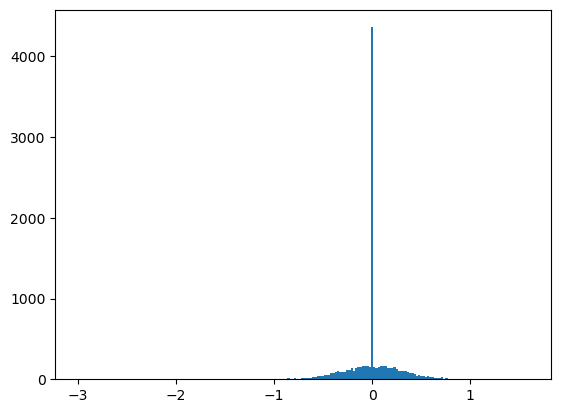

In [24]:
plt.hist(X.flatten(), bins=200)

In [63]:
a = pd.read_csv("GPT4A-subset-ero-20231215.csv")
g = []
a["v"] = a.conversation.apply(string_to_vec)


In [64]:
b = np.stack(a.v.values)
b.shape

(8753, 300)

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


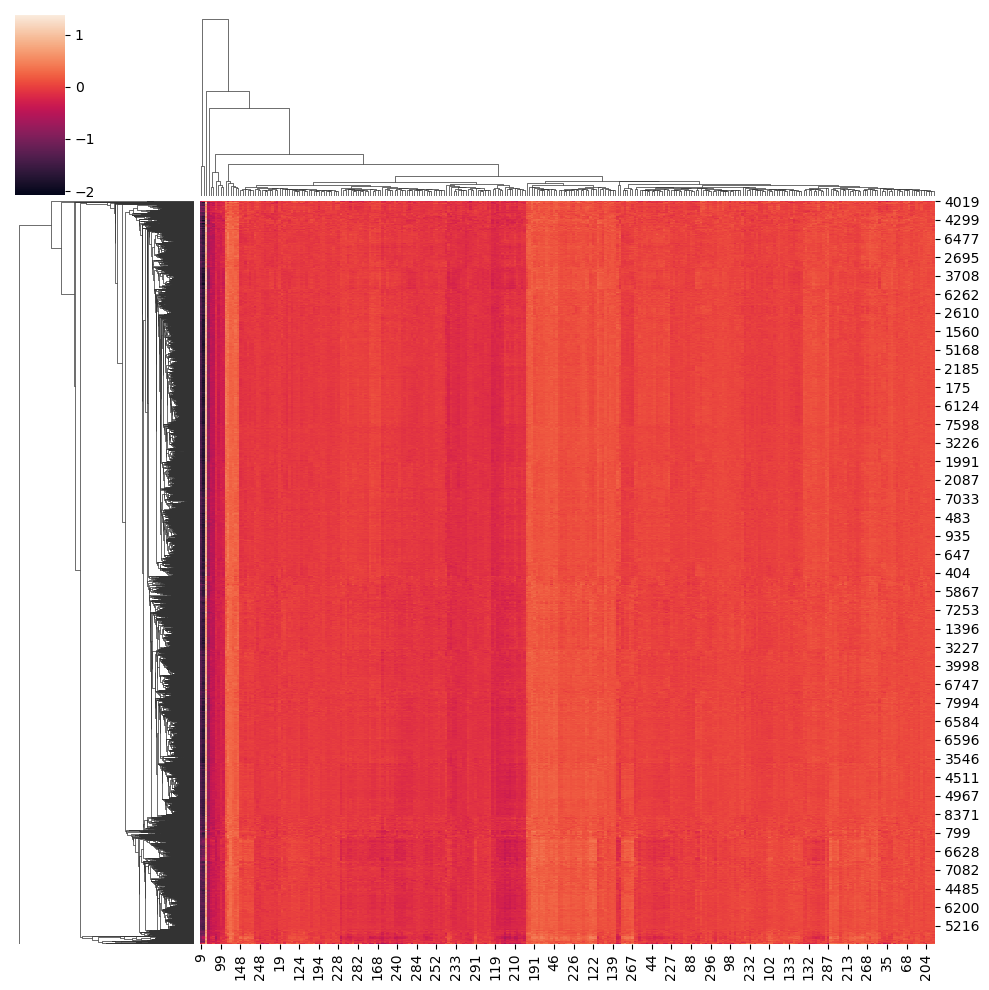

In [65]:
sns.clustermap(b)

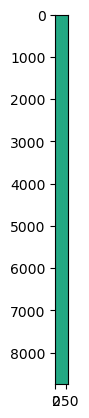

In [66]:
plt.imshow(b)



In [46]:
from sklearn.cluster import KMeans

In [67]:
fit = KMeans(n_clusters=10).fit(b)


/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(b.T)

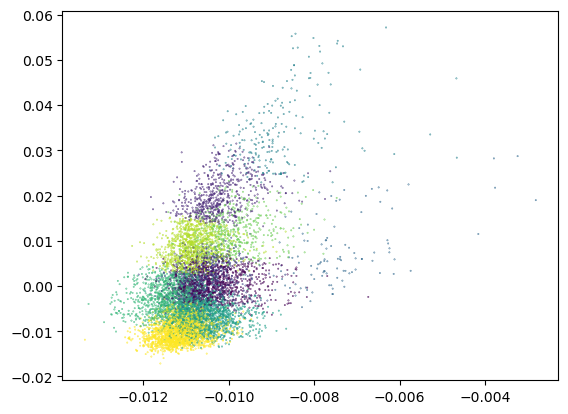

In [71]:
plt.scatter(pca.components_[0], pca.components_[1], c=fit.labels_ , s=0.1 )

In [72]:
from sklearn.manifold import TSNE

In [73]:
X_embedded = TSNE(n_components=2, learning_rate=.1, init='random').fit(b)

In [74]:
dir(X_embedded)

['_EXPLORATION_N_ITER',
 '_N_ITER_CHECK',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_check_params_vs_input',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tsne',
 '_validate_data',
 '_validate_params',
 'angle',
 'early_exaggeration',
 'embedding_',
 'fit',
 'fit_transform',
 'get_params',
 'init',
 'kl_divergence_',
 'learning_rate',
 'learning_rate_',
 'method',
 'metric',
 'metric_params',
 'min_grad_norm',
 'n_components',
 'n_features_in_',
 'n_iter',
 'n_it

In [75]:
dir(X_embedded.embedding_)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

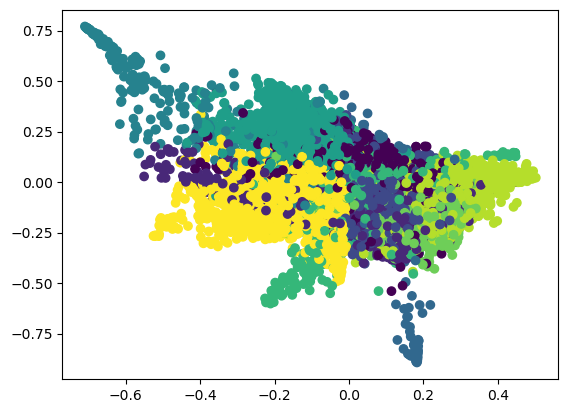

In [78]:
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1],c=fit.labels_  )